[딥 러닝을 위한 자연어 처리입문 문서를 요약한 자료입니다.(바로가기)](https://wikidocs.net/22660)

# 워드 임베딩
> 단어를 밀집 표현으로 변환하여 벡터로 만든다.

워드 임베딩을 학습하기 전에 희소표현, 밀집표현, 워드 임베딩에 대해서 알아보자.

### 희소 표현(Sparse Prepresentation)

- 원-핫 벡터들은 표현하고자 하는 단어의 인덱스만 1이고 나머지는 전부 0이다.
이러한 벡터 표현은 공간적 낭비를 불러일으킨다. 희소표현의 일종인 DTM과 같은 경우에도 공간 낭비가 발생한다.
- 이러한 원-핫 벡터는 단어의 의미를 담지 못한다.(유사성을 표현할 수 없다.)

### 밀집표현(Dense Representation)

- 희소 표현과 반대되는 개념
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춘다.  
예) 10,000개의 단어가 있을 때 강아지(인덱스 5)란 단어를 표현하기 위해,  
[0 0 0 0 0 1 0 0 0 0 ... ... 0] 과같이 표현했지만,  
벡터표현의 차원을 128로 바꾸어  [0.2 1.8 1.1 -2.1 1.1 2.8 ... ... ]같이 표현
-> 128차원

### 워드 임베딩

- 단어를 밀집 벡터의 형태로 표현하는 방법(임베딩 벡터)
- 희소 표현에서 원-핫 벡터는 단어의 유사성을 표현할 수 없었다.
    - **대안으로 단어의 의미를 여러 차원 공간에 벡터화한다.(분산표현)**
- LSA, Word2Vec, FastText, Glove등의 방법이 있다.

### Word2Vec
   - CBOW: 주변 단어로 **중간 단어** 예측
   - Skip-Gram: 중간 단어로 **주변 단어** 예측

#### 분산 표현(Distributed Representation)
> 분포가설 가정(**'비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'**) 하에 만들어졌다.

- 이와 같은 벡터들은 차원이 작다.(단어집합 크기일 필요가 없으므로)
- 분산표현방법(단어의 의미를 여러 차원에 분산)은 단어 간 유사도를 계산할 수 있다.

### CBOW(Continuous Bag of Words)
예) The fat cat sat on the mat
- 예측해야 하는 단어(sat)을 'center word'
- 예측에 사용되는 단어를 'context word'라 한다.

- 중심단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지 결정했다면 이 범위를 Window라고 한다.

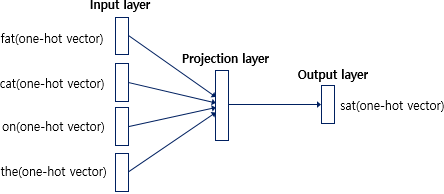

- 윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 데이터셋을 만든다.(슬라이딩 윈도우)

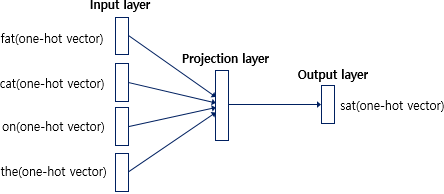
CBOW의 인공신경망을 간단히 도식화하면 위의 그림과 같다.
- 입력층(input layer)의 입력으로서 context word의 one-hot벡터가 들어간다.
- 출력층(output layer)에서 예측하고자 하는 center word의 one-hot벡터가 들어간다.
##### takeaways
1) Word2Vec은 하나의 은닉층만이 존재하므로 딥러닝 모델이 아니다.(얕은 신경망)
2) Word2Vec의 은닉층은 일반적인 은닉층과 달리 활성화함수가 존재하지 않는다.
- Word2Vec의 은닉층은 `룩업 테이블이라는 연산`을 담당하는 층으로 일반적인 은닉층과 구분하기 위해서 투사층(projection layer)이라고 부르기도 한다.

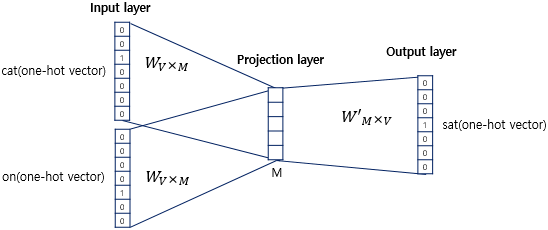
##### note
1) CBOW의 투사층의 크기가 M이다.
   - CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이다.
2) 입력/투사층 사이 가중치W는 V x M행렬이고, 투사/출력층의 가중치W'는 M x V 행렬이다.  
    - V: 단어 집합의 크기
    - W(V x M행렬)와 W'(M x V행렬)은 서로 다른 행렬이다.
    - 훈련 전 두 행렬은 굉장히 작은 랜덤값이지만, 주변 단어로부터 중심 단어를 더 정확히 맞추기 위해 계속 이 두 가중치를 학습해가는 구조이다.

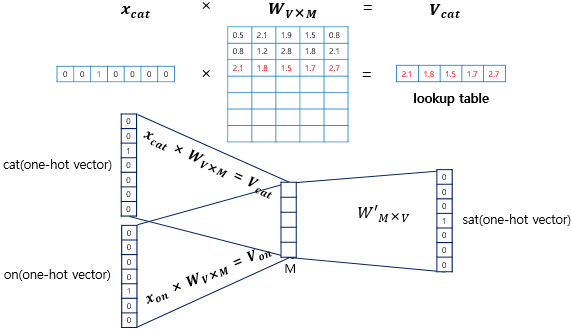

##### CBOW 동작 매커니즘
입력 원핫벡터x와 가중치W의 곱을 살펴보자.  
- i번째 인덱스에만 1이라는 값을 가지는 x와 W의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과 동일하다. 따라서 Lookup table이라고 한다.

- <u>앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 언급한 적이 있는데, 사실 그 이유가 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문입니다.???</u>

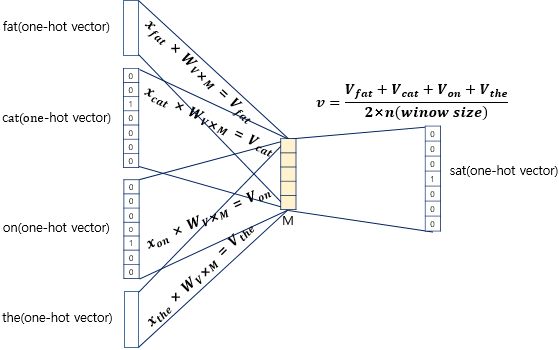

주변 단어의 원-핫 벡터와 가중치 W가 곱해진 결과벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 된다.  

윈도우의 크기가 n=2라면, 입력벡터의 수는 총 2n이므로 단어를 예측하기 위해서 4개가 입력벡터로 사용된다. 그렇기 때문에 4개의 결과 벡터에 대해서 평균을 구하게 된다.  

CBOW는 투사층에서 평균을 구하지만, Skip-Gram은 입력이 중심단어 하나이므로 평균을 구하지 않는다.

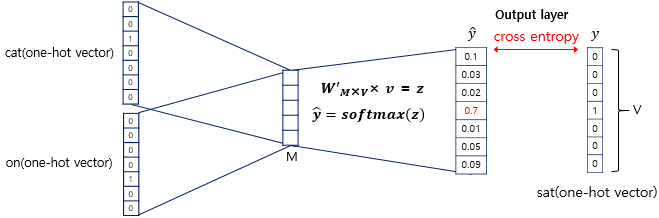
구한 평균벡터는 두번째 가중치 행렬 W'와 곱해진다.  

곱셈의 결과는 입력벡터와 같은 차원이 나온다.  

이 벡터에 CBOW는 softmax를 취하는데, 0~1사이의 실수로, 각 원소의 합은 1이 되는 상태로 바뀐다.이 벡터를 벡터 스코어라고 한다.  

스코어벡터의 j번째 인덱스의 값은 j번째 단어가 중심 단어일 확률을 나타낸다.  

이 스코어벡터는 우리가 알고있는 중심단어 원핫벡터와 가까워져야 한다. 이 두 벡터의 오차를 줄이기 위해 손실함수로 cross-entropy를 사용한다.  
𝑦̂ 을 스코어벡터라고 하자.
$$
H(\hat{y},y) = \sum_{j=1}^{|V|}y_jlog(\hat{y_j})
$$

cross-entropy 함수에 실제 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 위와 같다.

그런데 y가 원-핫 벡터이므로 식을 간소화시킬 수 있다.
$$
H(\hat{y},y) = -y_ilog(\hat{y_i})
$$
- 역전파를 수행하면 W와 W'가 학습되는데, 학습이 다 되면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 된다. 때로는 두 값의 평균치를 선택하기도 한다.